In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [33]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=4,random_state=0, cluster_std=0.4)

make blobs for clustering using make_blobs from samples_generator

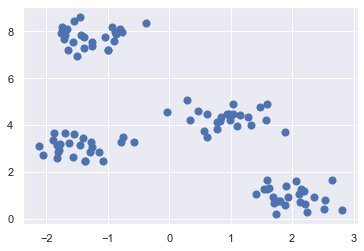

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='spring');

In [4]:
def distance(x,y):
    dis = math.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)
    return dis

defining a distance function to calculate distance of the (random) centroid from all the samples

In [5]:
distance(np.array([5,-1]),np.array([6,2]))

3.1622776601683795

In [6]:
def clusterassignment(x,means):
    diff = []
    for mean in means:
        diff.append(distance(x,mean))
    return diff.index(min(diff)) 

defining a cluster assignment function to assign samples to K clusters based on the distance of each sample from the nearest centroid 


In [7]:
clusterassignment([5,6],[[5,7],[5,6],[5,7]])

1

In [10]:
def kmean(allx,k,num_iters=100):
    mean=[]
    clsuter = []
    cost_ = []
    for i  in range(num_iters):
        means = allx[np.random.choice(allx.shape[0], k, replace=False), :]
        c = np.empty(allx.shape[0])
        for x,i in zip(allx,range(allx.shape[0])):
            c[i] = clusterassignment(x,means)

        for i in range(k):
            index_ = np.where(c==i)
            means[i] = np.sum(allx[index_],axis=0) / len(allx[index_])

        j = np.sum(np.apply_along_axis(np.linalg.norm, 1, (allx - means[c.astype(int),:]))**2)
        mean.append(means)
        clsuter.append(c)
        cost_.append(j)
        
    min_cost_index=(cost_.index(min(cost_)))
    means_ = mean[min_cost_index]
    c_ = clsuter[min_cost_index]
    min_cost = min(cost_)
    return means_,c_,min_cost

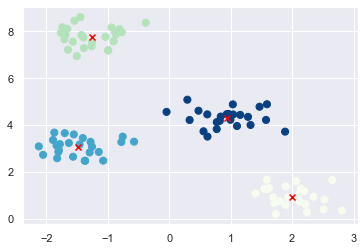

In [11]:
centroids,clusterassgn,costfunc = kmean(X,4,1000)
plt.scatter(X[:, 0], X[:, 1], s=50,c=clusterassgn, cmap='GnBu');
plt.scatter(centroids[:, 0], centroids[:, 1],color = 'red',marker='x')
plt.show()

choosing the means/centroids with minimum cost

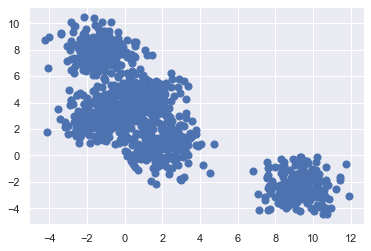

In [12]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=1000, centers=5,random_state=0, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='spring');

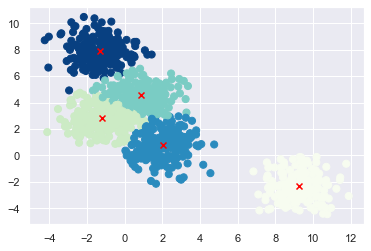

In [13]:
centroids,clusterassgn,costfunc = kmean(X,5,1000)
plt.scatter(X[:, 0], X[:, 1], s=50,c=clusterassgn, cmap='GnBu');
plt.scatter(centroids[:, 0], centroids[:, 1],color = 'red',marker='x')
plt.show()

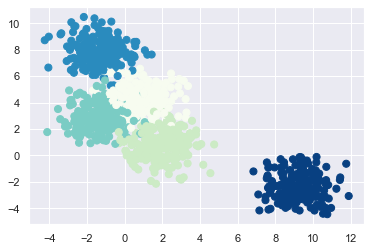

In [16]:
plt.scatter(X[:, 0], X[:, 1], s=50,c=y, cmap='GnBu');
plt.show()

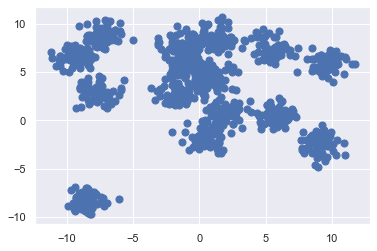

In [17]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=1000, centers=15,random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='spring');

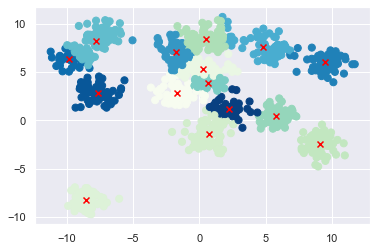

In [18]:
centroids,clusterassgn,costfunc = kmean(X,15,1000)
plt.scatter(X[:, 0], X[:, 1], s=50,c=clusterassgn, cmap='GnBu');
plt.scatter(centroids[:, 0], centroids[:, 1],color = 'red',marker='x')
plt.show()

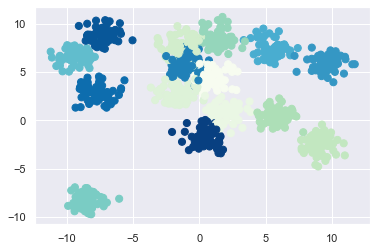

In [20]:
plt.scatter(X[:, 0], X[:, 1], s=50,c=y, cmap='GnBu');
plt.show()

choosing the number of clusters

In [26]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=4,random_state=0, cluster_std=0.6)

In [31]:
j_cost=[]
for i in range(1,15):
    centroids,clusterassgn,costfunc = kmean(X,i,1000)
    j_cost.append(costfunc)


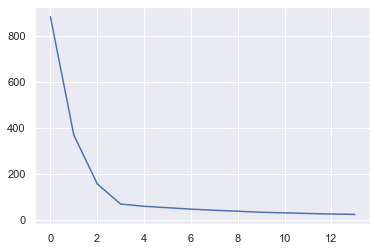

In [32]:
plt.plot(np.arange(len(j_cost)),j_cost)

In [30]:
print(j_cost)

[883.0169856326323, 369.50135734119937, 157.161676779852, 69.51737292596171, 59.652449011797074, 52.114426080758925, 46.149618929799644, 42.251671379763756, 38.28715649933897]
